### Logistic  Regression

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [21]:
data = pd.read_csv('HW3-data.csv')

In [24]:
data.head()

,ID,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
data.shape

(569, 32)

In [25]:
data['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [26]:
data.isnull().sum()

ID                 0
Diagnosis          0
RadiusM            0
TextureM           0
PerimeterM         0
AreaM              0
SmoothnessM        0
CompactnessM       0
ConcavityM         0
ConcavePointsM     0
SymmetryM          0
FdimensionM        0
RadiusSE           0
TextureSE          0
PerimeterSE        0
AreaSE             0
SmoothnessSE       0
CompactnessSE      0
ConcavitySE        0
ConcavePointsSE    0
SymmetrySE         0
FdimensionSE       0
RadiusW            0
TextureW           0
PerimeterW         0
AreaW              0
SmoothnessW        0
CompactnessW       0
ConcavityW         0
ConcavePointsW     0
SymmetryW          0
FdimensionW        0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               569 non-null    int64  
 1   Diagnosis        569 non-null    object 
 2   RadiusM          569 non-null    float64
 3   TextureM         569 non-null    float64
 4   PerimeterM       569 non-null    float64
 5   AreaM            569 non-null    float64
 6   SmoothnessM      569 non-null    float64
 7   CompactnessM     569 non-null    float64
 8   ConcavityM       569 non-null    float64
 9   ConcavePointsM   569 non-null    float64
 10  SymmetryM        569 non-null    float64
 11  FdimensionM      569 non-null    float64
 12  RadiusSE         569 non-null    float64
 13  TextureSE        569 non-null    float64
 14  PerimeterSE      569 non-null    float64
 15  AreaSE           569 non-null    float64
 16  SmoothnessSE     569 non-null    float64
 17  CompactnessSE   

In [28]:
data.describe()

,ID,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,SymmetryM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [29]:
data['Diagnosis'] = data['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [30]:
data['Diagnosis'].value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

c:\Users\amite\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


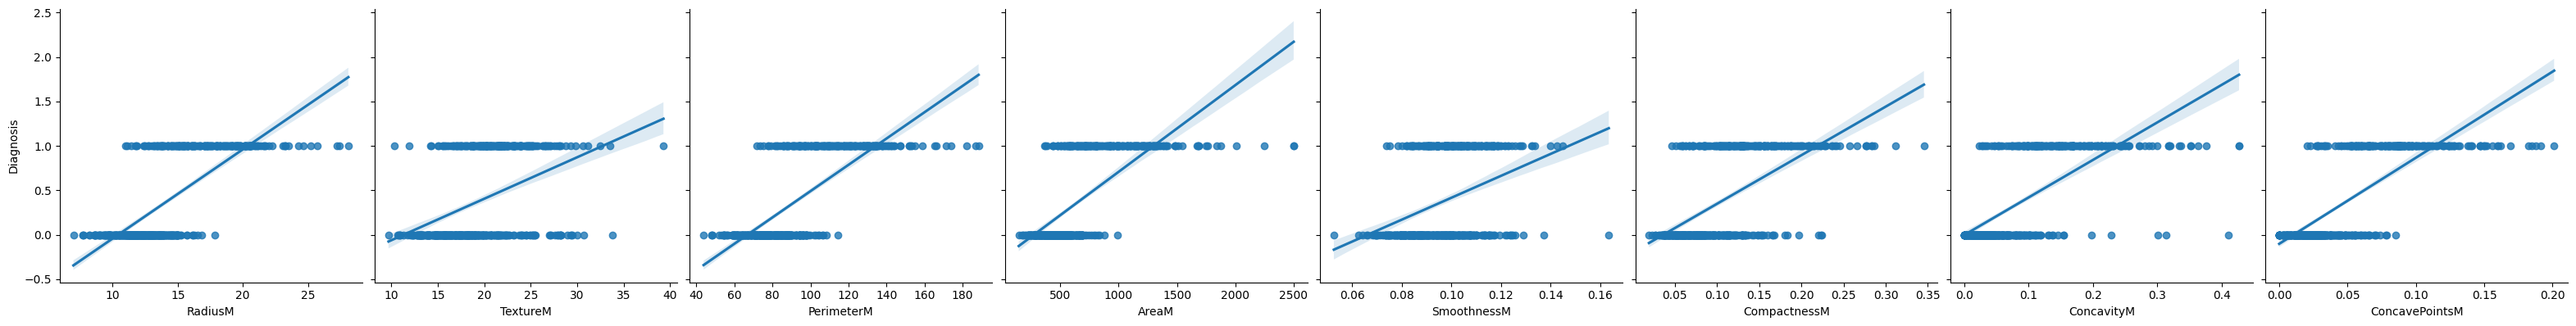

In [31]:
sns.pairplot(data, x_vars=['RadiusM', 'TextureM','PerimeterM', 'AreaM','SmoothnessM','CompactnessM','ConcavityM','ConcavePointsM'], 
             y_vars='Diagnosis', size=4, aspect=1, kind='reg')

In [35]:
data['Diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

In [36]:
data.head()

,ID,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='Diagnosis', ylabel='count'>

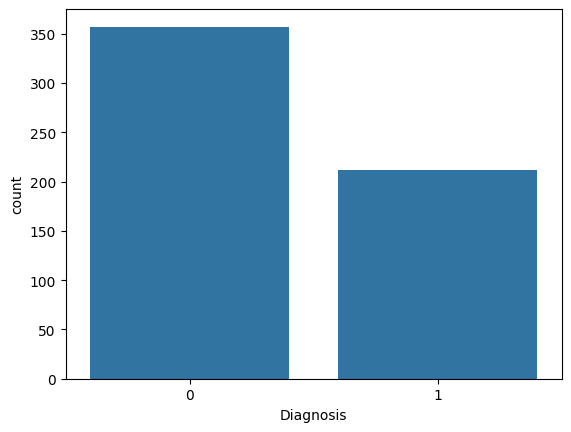

In [38]:
sns.barplot(data['Diagnosis'].value_counts())

In [ ]:
#batch_size = [data.columns[i:i+10] for i in range(0, len(data.columns), 10)]

#for batch in batch_size:
#    sns.pairplot(data[batch])

In [39]:
x = data.drop(['ID','Diagnosis'],axis =1)

In [40]:
y = data['Diagnosis']

In [41]:
data.drop(['ID'], axis =1, inplace = True)

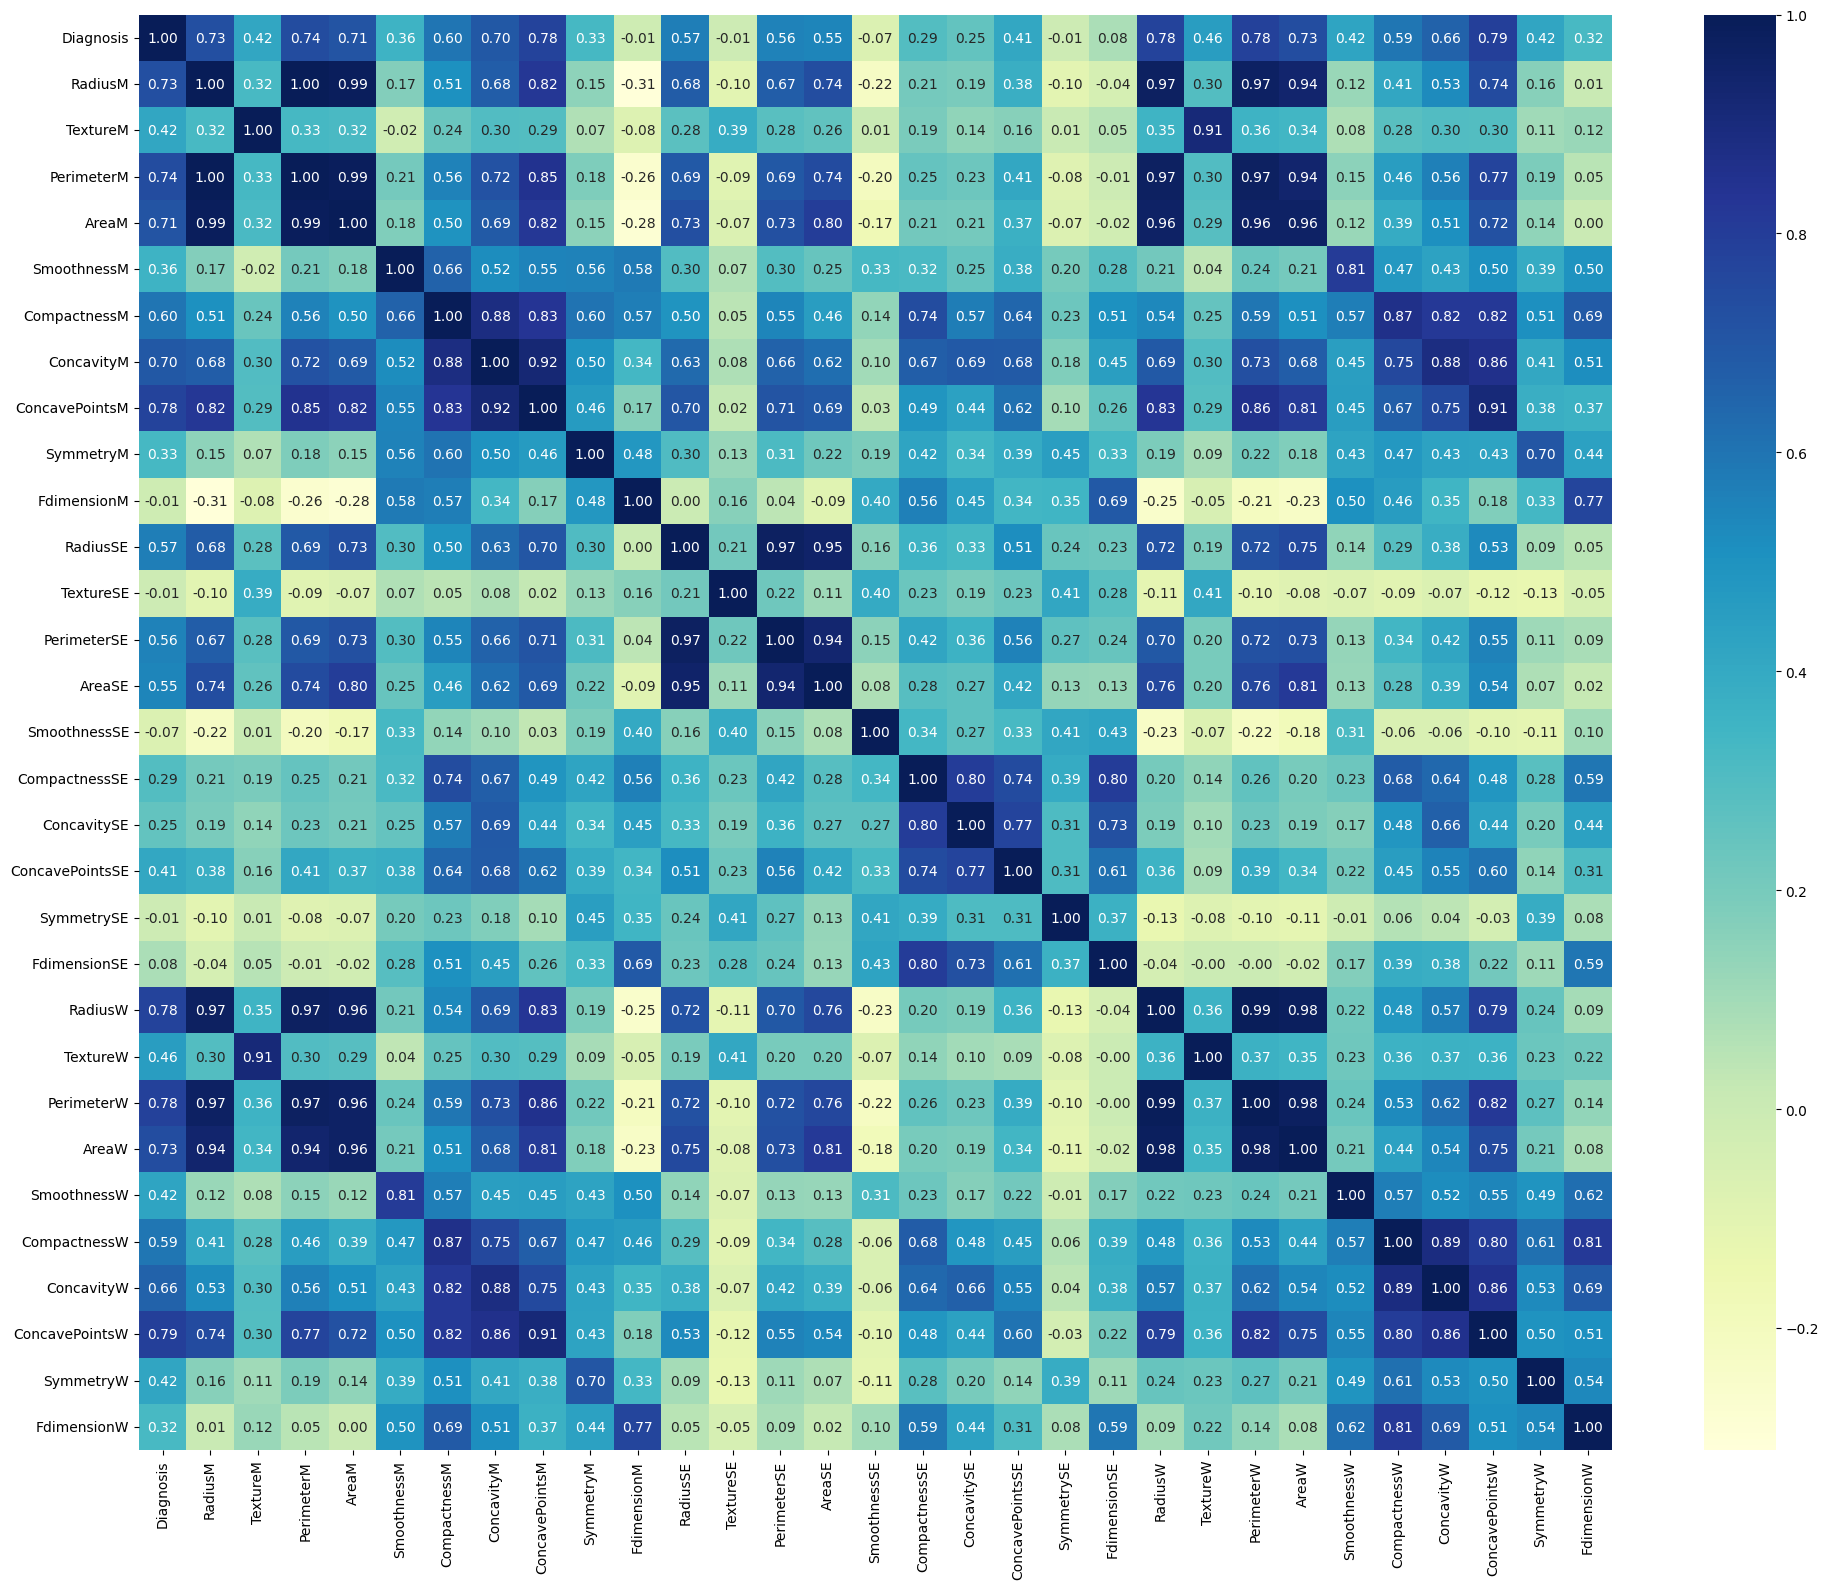

In [42]:
fig,ax = plt.subplots(figsize=(20,16))


sns.heatmap(data.corr(),annot=True, cmap = 'YlGnBu',fmt=".2f",ax=ax)

plt.tight_layout()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
import statsmodels.api as sm

In [45]:
X = sm.add_constant(x)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
X_adj = X.drop(['PerimeterM','RadiusM','RadiusW','PerimeterW','ConcavePointsM','ConcavityM','RadiusSE','PerimeterSE','ConcavePointsW','ConcavityW','AreaM','CompactnessW','CompactnessM','TextureW','TextureM'], axis=1)

In [48]:
vif_data = pd.DataFrame()
vif_data['variable'] = X_adj.columns

In [49]:
vif_data['VIF'] =  [variance_inflation_factor(X_adj.values,i) for i in range(X_adj.shape[1])]

In [50]:
vif_data

,variable,VIF
0,const,198.800252
1,SmoothnessM,5.662730
2,SymmetryM,3.572878
3,FdimensionM,7.027706
4,TextureSE,1.473341
5,AreaSE,4.506448
6,SmoothnessSE,3.254485
7,CompactnessSE,5.684637
8,ConcavitySE,3.975462
9,ConcavePointsSE,3.889947


In [51]:
logistic_model = sm.Logit(y,X_adj)

In [52]:
logistic_model = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.068943
         Iterations 14


In [53]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      553
Method:                           MLE   Df Model:                           15
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.8956
Time:                        12:35:41   Log-Likelihood:                -39.229
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.060e-133
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -34.2482      7.589     -4.513      0.000     -49.123     -19.374
SmoothnessM        -2.6684     68.531     -0.039      0.969    -136.986     131.649
SymmetryM         -26.6869     24.168     -1.104      0.269     -74.054      20.681
FdimensionM      -208.4727    141.796     -1.470      0.141    -486.387      69.442
TextureSE           2.6893      0.827      3.251      0.001       1.068       4.310
AreaSE              0.0875      0.038      2.331      0.020       0.014       0.161
SmoothnessSE      294.4158    207.208      1.421      0.155    -111.705     700.536
CompactnessSE     -37.9309     55.275     -0.686      0.493    -146.268      70.406
ConcavitySE        21.8094     16.344      1.334      0.182     -10.223      53.842
ConcavePointsSE   298.4228    128.544      2.322      0.020      46.482     550.364
SymmetrySE         10.3346     75.590      0.137      0.891    -137.818     158.487
FdimensionSE    -1681.1810    617.713     -2.722      0.006   -2891.877    -470.485
AreaW               0.0151      0.003      4.532      0.000       0.009       0.022
SmoothnessW        56.3725     43.686      1.290      0.197     -29.250     141.995
SymmetryW          20.1905     11.950      1.690      0.091      -3.231      43.612
FdimensionW       246.4236     76.894      3.205      0.001      95.714     397.133
===================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [54]:
y_pred = logistic_model.predict(X_adj)

In [55]:
y_pred

0      1.000000e+00
1      1.000000e+00
2      1.000000e+00
3      9.999927e-01
4      9.999996e-01
           ...     
564    1.000000e+00
565    1.000000e+00
566    9.658187e-01
567    1.000000e+00
568    1.717566e-07
Length: 569, dtype: float64

In [60]:
from sklearn import metrics


The Area Under the ROC Curve is :  0.9962211299614185


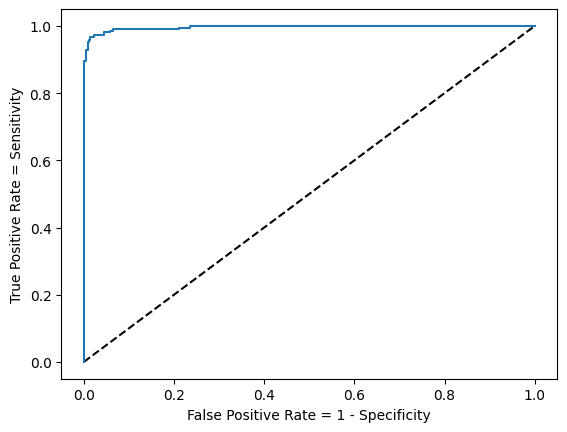

In [57]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y,y_pred);
plt.plot([0, 1], [0, 1], 'k--');
plt.plot(fpr, tpr);
plt.xlabel('False Positive Rate = 1 - Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
print('\nThe Area Under the ROC Curve is : ', metrics.auc(fpr,tpr))

In [58]:
Y_pred = pd.DataFrame() # Declare a panda
threshold = 0.5
Y_pred['Class_true'] = y
Y_pred['Class_pred'] = 1*(y_pred>threshold)

Y_pred

,Class_true,Class_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
564,1,1
565,1,1
566,1,1
567,1,1


In [62]:
accuracy = metrics.accuracy_score(y,Y_pred['Class_pred'])

In [63]:
accuracy 

0.9771528998242531

## Model 2

In [64]:
x_train, x_test,y_train,y_test = train_test_split(X_adj,y, train_size = 0.7, test_size = 0.3, random_state=1)

In [65]:
logistic_model = sm.Logit(y_train,x_train)

In [66]:
logistic_model = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.052308
         Iterations 15


In [67]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      382
Method:                           MLE   Df Model:                           15
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.9209
Time:                        12:37:26   Log-Likelihood:                -20.818
converged:                       True   LL-Null:                       -263.17
Covariance Type:            nonrobust   LLR p-value:                 9.657e-94
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -45.6227     13.052     -3.495      0.000     -71.205     -20.041
SmoothnessM       -15.9188     96.179     -0.166      0.869    -204.425     172.588
SymmetryM         -10.0388     37.630     -0.267      0.790     -83.792      63.714
FdimensionM      -163.8690    213.579     -0.767      0.443    -582.476     254.738
TextureSE           3.9081      1.376      2.840      0.005       1.211       6.605
AreaSE              0.1051      0.081      1.302      0.193      -0.053       0.263
SmoothnessSE      275.0079    337.045      0.816      0.415    -385.588     935.604
CompactnessSE     -89.5235    105.359     -0.850      0.395    -296.023     116.976
ConcavitySE        77.9076     64.487      1.208      0.227     -48.485     204.300
ConcavePointsSE   480.6263    216.067      2.224      0.026      57.142     904.110
SymmetrySE        -28.4728    146.950     -0.194      0.846    -316.490     259.544
FdimensionSE    -2365.9727    850.988     -2.780      0.005   -4033.878    -698.068
AreaW               0.0185      0.005      3.462      0.001       0.008       0.029
SmoothnessW         0.7891     63.825      0.012      0.990    -124.306     125.885
SymmetryW          32.9608     19.001      1.735      0.083      -4.280      70.202
FdimensionW       326.1728    119.415      2.731      0.006      92.124     560.222
===================================================================================

Possibly complete quasi-separation: A fraction 0.59 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [261]:
y1_pred = logistic_model.predict(x_test)

In [262]:
y1_pred

421    0.083066
47     0.991659
292    0.000968
186    0.999796
414    0.885919
         ...   
6      0.999998
487    1.000000
11     0.999292
268    0.000452
419    0.000070
Length: 171, dtype: float64

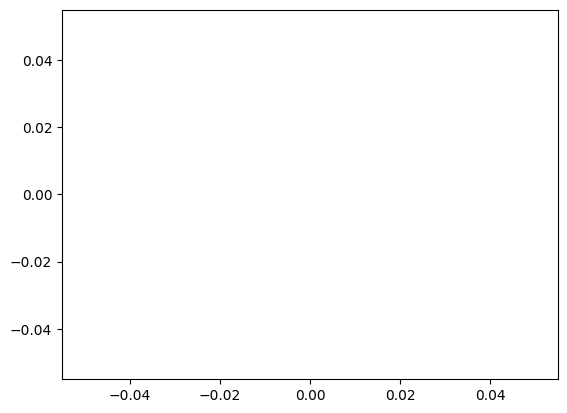

In [260]:

plt.plot(p_pred,y1_pred)


In [258]:
p_pred = np.log(y1_pred / (1 - y1_pred))

c:\Users\amite\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



The Area Under the ROC Curve is :  0.9885361552028219


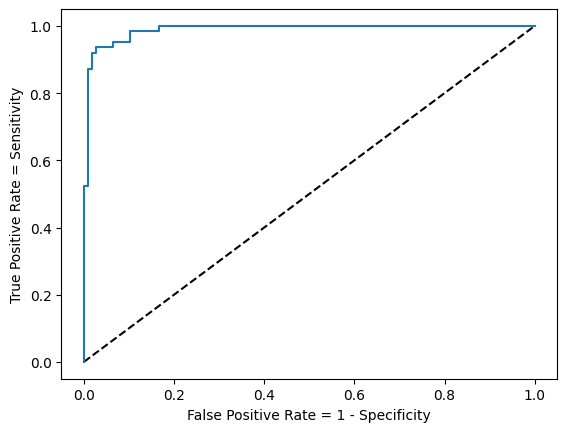

In [130]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y1_pred);
plt.plot([0, 1], [0, 1], 'k--');
plt.plot(fpr, tpr);
plt.xlabel('False Positive Rate = 1 - Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
print('\nThe Area Under the ROC Curve is : ', metrics.auc(fpr,tpr))

In [131]:
from sklearn.metrics import accuracy_score

In [77]:
y_test

421    0
47     1
292    0
186    1
414    1
      ..
6      1
487    1
11     1
268    0
419    0
Name: Diagnosis, Length: 171, dtype: int64

In [132]:
y1_pred

421    0.544645
47     0.999929
292    0.004426
186    0.999735
414    0.974242
         ...   
6      1.000000
487    1.000000
11     1.000000
268    0.000873
419    0.000054
Length: 171, dtype: float64

In [78]:
Y_binary = pd.DataFrame()

Y_binary['y_pred'] = 1*(y1_pred>0.5)
Y_binary['True_class'] = y_test

In [79]:
Y_binary

,y_pred,True_class
421,1,0
47,1,1
292,0,0
186,1,1
414,1,1
...,...,...
6,1,1
487,1,1
11,1,1
268,0,0


In [80]:
metrics.confusion_matrix(Y_binary['True_class'],Y_binary['y_pred'])

array([[103,   5],
       [  4,  59]], dtype=int64)

In [81]:
accuracy = accuracy_score(y_test, Y_binary['y_pred'])

In [124]:
accuracy

0.9473684210526315

In [102]:
MLH_M =logistic_model.llf # MLH of our Model
MLH_M

-20.81846438841551

In [103]:
ones = np.sum(y)
zeros = len(y) - ones
p = ones/len(y)

MLH = ones * np.log(p) + zeros * np.log(1-p)

MLH

-375.7200026920845

In [106]:
G = 2*(MLH_M - MLH)
G

709.803076607338

In [121]:
from scipy.stats import chi2
p_value = chi2.sf(G, df=np.shape(X_adj)[1]-1)
print("P_values is:", p_value ,'\n Indicating our model explains the data fer better than the NUll-Model')

P_values is: 1.512841438416917e-141 
 Indicating our model explains the data fer better than the NUll-Model


In [122]:
chi2.ppf(0.95,df=np.shape(X_adj)[1]-1)

24.995790139728616

### Min improvement with (95% confidence) between model is 25, And We have an improvement of 709

## PCA

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

In [203]:
x.describe()

,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,SymmetryM,FdimensionM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [158]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform()

In [165]:
X_scaled = pd.DataFrame(X_scaled, columns=X_adj.columns)

X_scaled.describe()

,const,SmoothnessM,SymmetryM,FdimensionM,TextureSE,AreaSE,SmoothnessSE,CompactnessSE,ConcavitySE,ConcavePointsSE,SymmetrySE,FdimensionSE,AreaW,SmoothnessW,SymmetryW,FdimensionW
count,569.0,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02
mean,0.0,-8.366672e-16,1.748260e-16,4.745277e-16,-1.123881e-16,-1.311195e-16,-1.529727e-16,1.748260e-16,1.623384e-16,0.000000,8.741299e-17,-6.243785e-18,0.000000,-2.372638e-16,2.622390e-16,-5.744282e-16
std,0.0,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00
min,0.0,-3.112085e+00,-2.744117e+00,-1.819865e+00,-1.554264e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447,-1.532890e+00,-1.096968e+00,-1.222423,-2.682695e+00,-2.160960e+00,-1.601839e+00
25%,0.0,-7.109628e-01,-7.032397e-01,-7.226392e-01,-6.948092e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-0.674490,-6.516807e-01,-5.851185e-01,-0.642136,-6.912304e-01,-6.418637e-01,-6.919118e-01
50%,0.0,-3.489108e-02,-7.162650e-02,-1.782793e-01,-1.974976e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-0.140496,-2.194304e-01,-2.299405e-01,-0.341181,-4.684277e-02,-1.274095e-01,-2.164441e-01
75%,0.0,6.361990e-01,5.307792e-01,4.709834e-01,4.665523e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,0.472657,3.556925e-01,2.886421e-01,0.357589,5.975448e-01,4.501382e-01,4.507624e-01
max,0.0,4.770911e+00,4.484751e+00,4.910919e+00,6.655279e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601,7.071917e+00,9.851593e+00,5.930172,3.955374e+00,6.046041e+00,6.846856e+00


In [182]:
n_components = 3
pca = PCA(n_components)

In [183]:
principal_components = pca.fit_transform(X_scaled)

In [184]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.38295685, 0.14733654, 0.13907796])

In [204]:
### Using Other scaling method

In [186]:
scaler_M = MinMaxScaler()

In [205]:
M_scaled = scaler_M.fit_transform(x)
M_scaled = pd.DataFrame(M_scaled, columns=x.columns)

M_scaled.describe()

,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,SymmetryM,FdimensionM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
n_components = 
pca = PCA()

In [207]:
principal_components = pca.fit_transform(M_scaled)

In [208]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.30976894e-01, 1.72834896e-01, 7.11444201e-02, 6.41125883e-02,
       4.08607204e-02, 3.07149442e-02, 1.58083746e-02, 1.19147161e-02,
       9.88429103e-03, 9.45446106e-03, 8.49396551e-03, 7.57976457e-03,
       6.56638137e-03, 4.74811462e-03, 2.69423338e-03, 2.57754484e-03,
       1.83755588e-03, 1.51271660e-03, 1.37718463e-03, 1.05959242e-03,
       9.83061040e-04, 7.84496266e-04, 5.28060046e-04, 5.09986666e-04,
       4.30073326e-04, 3.29617326e-04, 1.90574049e-04, 5.59104265e-05,
       2.88966877e-05, 5.96453235e-06])

In [209]:
cumulative_variance = np.cumsum(explained_variance)

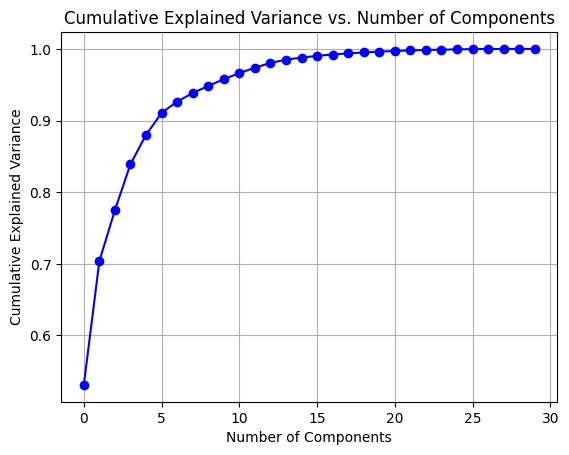

In [213]:
plt.figure()
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [225]:
n_components =7

In [226]:
pca_C = PCA(7)

In [227]:
principal_components = pca_C.fit_transform(M_scaled)

In [228]:
explained_variance = pca_C.explained_variance_ratio_
explained_variance

array([0.53097689, 0.1728349 , 0.07114442, 0.06411259, 0.04086072,
       0.03071494, 0.01580837])

In [229]:
PCA_data = pd.DataFrame(principal_components)

In [231]:
x1 = PCA_data

In [232]:
x1 = sm.add_constant(x1)

In [233]:
x_train, x_test,y_train,y_test = train_test_split(x1,y, train_size = 0.7, test_size = 0.3, random_state=1)

In [234]:
logistic_model = sm.Logit(y_train,x_train)

In [235]:
logistic_model = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.063717
         Iterations 11


In [236]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                            7
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.9036
Time:                        16:09:20   Log-Likelihood:                -25.360
converged:                       True   LL-Null:                       -263.17
Covariance Type:            nonrobust   LLR p-value:                 1.387e-98
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9389      0.556     -1.689      0.091      -2.028       0.151
0             20.5097      4.174      4.914      0.000      12.329      28.691
1            -10.3055      2.571     -4.008      0.000     -15.345      -5.266
2              3.8908      1.650      2.358      0.018       0.656       7.125
3             -5.1240      2.713     -1.889      0.059     -10.441       0.193
4            -10.2539      4.512     -2.273      0.023     -19.096      -1.411
5             -0.4036      3.132     -0.129      0.897      -6.541       5.734
6             -1.0247      4.983     -0.206      0.837     -10.792       8.742
==============================================================================

Possibly complete quasi-separation: A fraction 0.54 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [247]:
y1_pred = logistic_model.predict(x_train)

In [248]:
y1_pred = 1*(y1_pred>0.5)

In [249]:
metrics.accuracy_score(y_train,y1_pred)

0.9849246231155779

In [241]:
y2_pred = logistic_model.predict(x_test)

In [242]:
y2_pred = 1*(y1_pred>0.5)

In [263]:
metrics.accuracy_score(y_test,y2_pred)

0.9649122807017544

In [264]:
metrics.confusion_matrix(y_test,y2_pred)

array([[105,   3],
       [  3,  60]], dtype=int64)